<a href="https://colab.research.google.com/github/chamberslaura/Machine-Intelligence/blob/main/Resnet18_shoe_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the required libraries
!pip install mat4py   #For reading the .mat files in the dataset
import pandas as pd
import mat4py
from fastai.vision import *
from fastai.metrics import error_rate

#Download images

In [ ]:
#Downloading and extracting the dataset
!wget http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images-square.zip 
!wget http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-data.zip
!unzip ut-zap50k-images-square.zip
!unzip ut-zap50k-data.zip

In [3]:
image_paths = mat4py.loadmat("ut-zap50k-data/image-path.mat")
image_path=[i[0] for i in image_paths["imagepath"]]
meta_data=pd.read_csv("ut-zap50k-data/meta-data.csv")
meta_data["path"]=image_path
meta_data.shape
print("Done")

Done


In [4]:
meta_data_clean=meta_data[-meta_data.Category.isna()]
meta_data_clean=meta_data_clean[(meta_data_clean.Category=="Shoes") | (meta_data_clean.Category=="Boots") | (meta_data_clean.Category=="Sandals") | (meta_data_clean.Category=="Slippers")]
meta_data_clean=meta_data_clean[["path","Category"]]
print("Done")

Done


In [5]:
meta_data_clean.loc[meta_data_clean.path.str.contains("./",regex=False),"path"] = [i.replace("./","%2E/") for i in meta_data_clean.loc[meta_data_clean.path.str.contains("./",regex=False),"path"]]
print("Done")

Done


In [6]:
data=ImageDataBunch.from_df(path="ut-zap50k-images-square/", df=meta_data_clean, valid_pct=0.2,size=224,bs=64)
print("Done")

Done


In [7]:
data.classes


['Boots', 'Sandals', 'Shoes', 'Slippers']

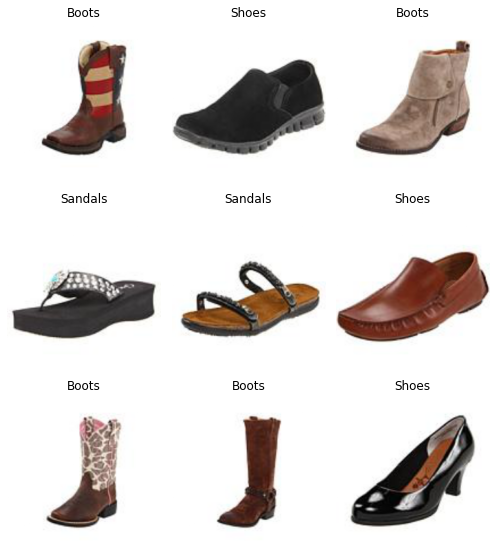

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.c, len(data.train_ds), len(data.valid_ds)

(4, 40020, 10005)

#Training

In [10]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [11]:
defaults.device = torch.device('cuda')

In [12]:
learn.unfreeze()

In [13]:
learn.fit_one_cycle(3, max_lr=slice(2E-04, 2E-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.199250,0.198889,0.068366,02:53
1,0.152288,0.126175,0.042779,02:54
2,0.071347,0.104454,0.036482,02:54


In [14]:
learn.save('shoe-classification-stage-1')

#Evaluation

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

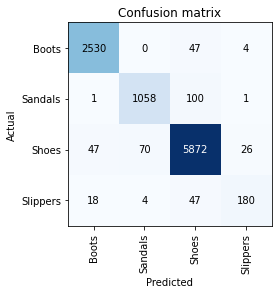

In [16]:
interp.plot_confusion_matrix()

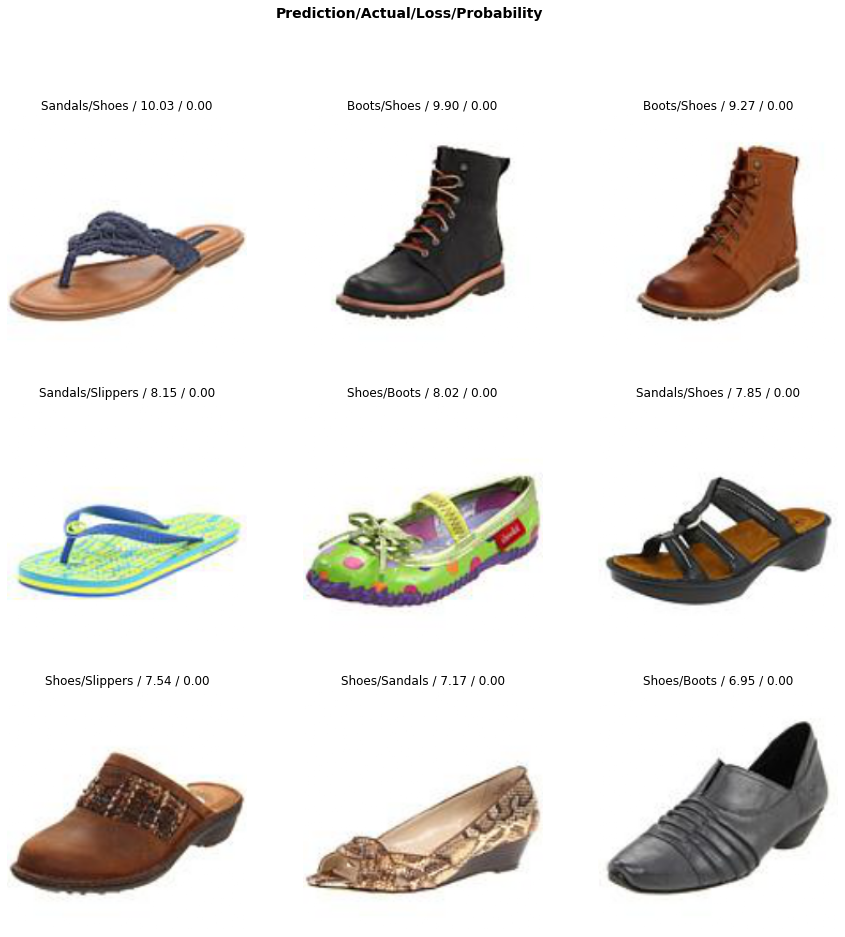

In [17]:
interp.plot_top_losses(9, figsize=(15,15))